In [1]:
from __future__ import division, print_function
%matplotlib inline

import supersmoother
import untrendy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import kplr
import clean_and_search

In [3]:
kic = 10593626
pdc = True

C = clean_and_search.Clean()
C.get_data(10593626)


koi = kplr.API().koi(87.01)
period = koi.koi_period
T0 = koi.koi_time0bk

In [4]:
C.flux = C.remove_post_earth_point(C.time,C.flux, window=1)
C.norm_by_quarter()

clean_and_search.py:80: RuntimeWarning: invalid value encountered in greater_equal
  trange = np.logical_and(time >= tep,time < tep + 2.0)
clean_and_search.py:80: RuntimeWarning: invalid value encountered in less
  trange = np.logical_and(time >= tep,time < tep + 2.0)


In [5]:
#C.medfilt(window=4)
nanmask = np.isfinite(C.time) & np.isfinite(C.flux) & np.isfinite(C.ferr)

time = C.time[nanmask]
flux = C.flux[nanmask]
ferr = C.ferr[nanmask]

transitmask = np.zeros_like(time,dtype=bool)
ffil = np.copy(flux)
for i in np.arange(7):
    transitmask = transitmask | ((time >= T0+(period*i)-0.4) & (time <= T0+(period*i)+0.4))
    ffil[(time >= T0+(period*i)-0.4) & (time <= T0+(period*i)+0.4)] = np.nanmedian(flux[(time >= T0+(period*i)-0.8) & (time <= T0+(period*i)+0.8)])


/Users/tom/.virtualenvs/p1/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [6]:
window=2.0
cflux = flux / untrendy.median(
            time, ffil,dt=1.0)
cferr = ferr

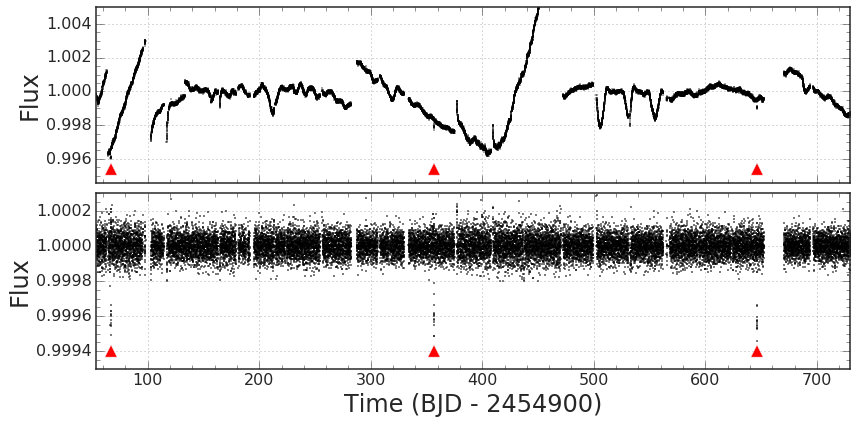

In [25]:
#plt.scatter(time, flux)
sigmask = cflux > 0.9998
offset = 2454833 - 2454900

dot_x = T0 + np.arange(0,6)*period
dot_y = np.ones_like(dot_x) - 0.0006

fig,[ax1,ax2] = plt.subplots(2,1,figsize=[12,6],sharex=True)
ax1.scatter(offset + time, flux,c='k',s=2,marker='.',edgecolors='k')
ax1.scatter(offset + dot_x,dot_y - 0.004,s=150,c='r',marker='^')
ax1.set_ylim([0.9946,1.005])
ax1.minorticks_on()

ax2.scatter(offset + time[sigmask], cflux[sigmask],c='k',s=4,marker='.',edgecolors='k')
ax2.scatter(offset + time[transitmask],cflux[transitmask],c='k',s=4,marker='.',edgecolors='k')
ax2.set_ylim([0.9993,1.0003])
ax2.set_xlim([np.min(offset + time),730])
ax2.scatter(offset+dot_x,dot_y,s=150,c='r',marker='^')
ax2.minorticks_on()

ax2.set_xlabel('Time (BJD - 2454900)')

ax1.grid()
ax2.grid()

ax1.set_ylabel('Flux')
ax2.set_ylabel('Flux')

fig.tight_layout()
fig.savefig('k22b_timseries.eps')

In [314]:
#plt.scatter(C.time,C.flux,s=1)

fig = plt.figure(figsize=[12,7])
plt.scatter(C.time,C.cflux,s=10)
dot_x = T0 + np.arange(0,6)*period
dot_y = np.ones_like(dot_x) - 0.0003
plt.scatter(dot_x,dot_y,s=30,c='r')
plt.ylim([0.9989,1.0002])
plt.xlim([np.nanmin(C.time),1100])
plt.minorticks_on()
plt.grid()

AttributeError: 'Clean' object has no attribute 'cflux'

In [198]:
f.shape

(57012,)

In [199]:
import supersmoother
nanmask = np.isfinite(C.time) & np.isfinite(C.flux) & np.isfinite(C.ferr)

from scipy.signal import savgol_filter
f = savgol_filter(C.flux[nanmask], 101, 2)

(0.9989, 1.0002)

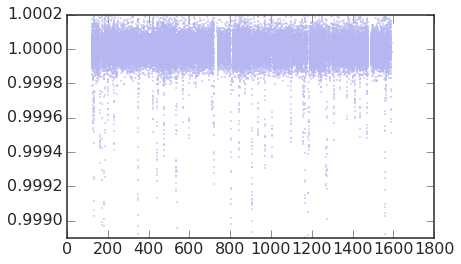

In [209]:
plt.scatter(C.time[nanmask],C.flux[nanmask]/f,s=1)
plt.ylim([0.9989,1.0002])

array([ nan,  nan,  nan, ...,  nan,  nan,  nan])

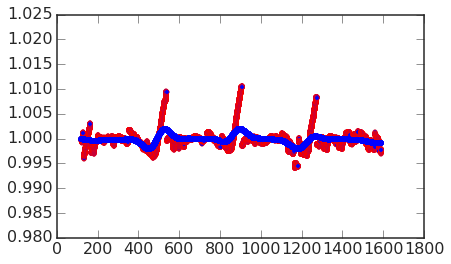

In [180]:

plt.scatter(C.time[nanmask],C.flux[nanmask],color='r')
plt.scatter(C.time[nanmask],model.predict(C.time[nanmask]),color='b')

IndexError: index 57012 is out of bounds for axis 1 with size 57012

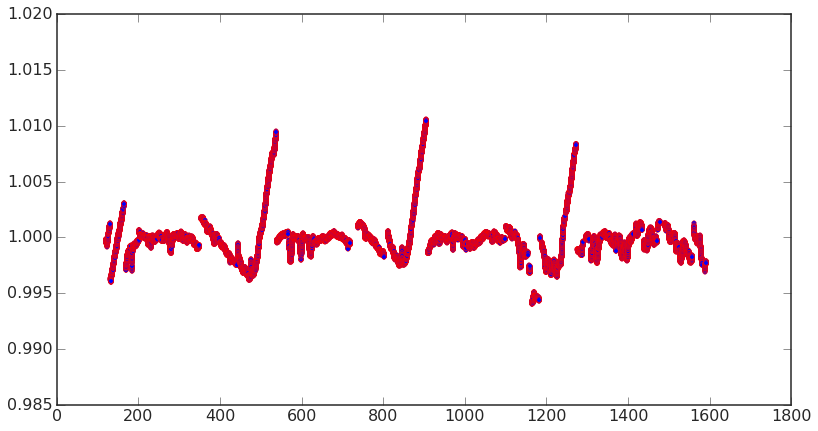

In [182]:
fig = plt.figure(figsize=[12,7])
plt.scatter(C.time[nanmask],C.flux[nanmask],color='r')
plt.plot(C.time[nanmask],f[nanmask], color='b')

In [57]:
def MAD(xx):
    """Median Absolute Deviation
    """
    med=np.median(xx,0)
    absdev=np.abs(np.subtract(xx,med))
    mad=np.median(absdev,0)

    return 1.48 * mad

maxiter = 5
sigma=20

flux2 = np.copy(cflux)
time2 = np.copy(time)
ferr2 = np.copy(ferr)
i = 0
while i < maxiter:
    med_val = np.median(flux2)
    std_val = MAD(flux2) * sigma
    inc_data = np.logical_and(flux2 > (med_val-std_val),
        flux2 < (med_val+std_val))
    if len(flux2) == len(flux2[inc_data]):
        break
    flux2 = flux2[inc_data]
    time2 = time2[inc_data]
    ferr2 = ferr2[inc_data]

ctime = time2
cflux = flux2
cferr = ferr2

/Users/tom/.virtualenvs/p1/lib/python2.7/site-packages/IPython/kernel/__main__.py:20: RuntimeWarning: invalid value encountered in greater
/Users/tom/.virtualenvs/p1/lib/python2.7/site-packages/IPython/kernel/__main__.py:21: RuntimeWarning: invalid value encountered in less


(0.9994, 1.0002)

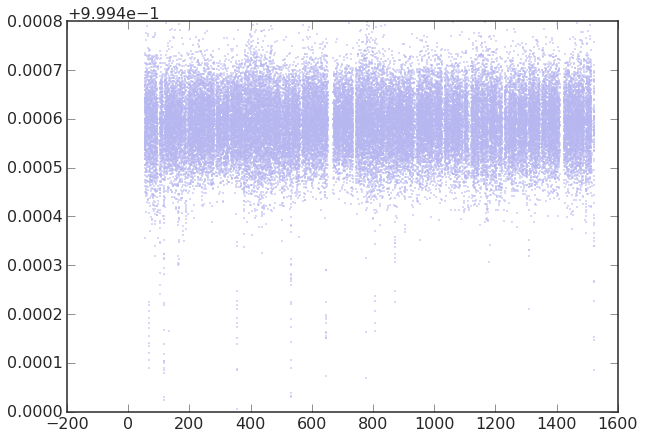

In [59]:
fig = plt.figure(figsize=[9,7])
plt.scatter(ctime+2454833-2454900,cflux,s=1)
plt.ylim(0.9994,1.0002)